In [ ]:
#inspect(f12)
#pandas data frame
# Xử lý lỗi SSL

# from urllib import request
# import ssl
# import pandas as pd


# url="https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx?txttungay=09/12/2019&BacrhID=1&isEn=True"
# context = ssl._create_unverified_context()
# response = request.urlopen(url, context=context)
# html = response.read()

# df = pd.read_html(html)

In [2]:
import pandas as pd
from datetime import datetime,date,time,timedelta

In [3]:
url = pd.read_html('https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx?txttungay=15/12/2019&BacrhID=1&isEn=True')
url

[             Currency               Buying Rates           Selling Rates
         Currency Name Currency Code         Cash  Transfer Selling Rates
 0         AUST.DOLLAR           AUD     15775.83  15876.21      16171.55
 1     CANADIAN DOLLAR           CAD     17284.88  17447.08      17769.13
 2        SWISS FRANCE           CHF     23156.62  23325.04      23747.06
 3        DANISH KRONE           DKK            -   3413.84       3520.85
 4                EURO           EUR     25656.53  25738.81      26537.46
 5       BRITISH POUND           GBP     30868.17  31090.95      31392.92
 6     HONGKONG DOLLAR           HKD      2922.18   2942.81       2994.94
 7        INDIAN RUPEE           INR            -    327.58        340.43
 8        JAPANESE YEN           JPY       201.48    208.07        214.68
 9    SOUTH KOREAN WON           KRW        18.06     19.02         21.06
 10      KUWAITI DINAR           KWD            -  76107.25      79093.60
 11  MALAYSIAN RINGGIT           MYR  

In [12]:
link = 'https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx?txttungay=15/12/2019&BacrhID=1&isEn=True'
dataframe = pd.read_html(link)
new_dataframe = dataframe[0]

In [3]:
import pandas as pd
from datetime import datetime,date,time,timedelta
import numpy as np

In [4]:
ngay_bat_dau = date(2019,12,1)
while ngay_bat_dau < date.today() :
    ngay = ngay_bat_dau.strftime("%d/%m/%Y")
    link = 'https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx?txttungay={}&BacrhID=1&isEn=True'.format(ngay)
    data_frame = pd.read_html(link)[0]
    data_frame['Date'] = ngay
    data_frame.to_excel(r'D:\Ty gia VCB\Ty gia ngay {}.xlsx'.format(ngay_bat_dau.strftime('%d_%m_%Y')))
    ngay_bat_dau = ngay_bat_dau + timedelta(days=1)
    

In [6]:
Ty_gia_1 = pd.read_excel(r'D:\Ty gia VCB\Ty gia ngay 01_12_2019.xlsx')
Ty_gia_2 = pd.read_excel(r'D:\Ty gia VCB\Ty gia ngay 02_12_2019.xlsx')
Ty_gia_3 = pd.read_excel(r'D:\Ty gia VCB\Ty gia ngay 03_12_2019.xlsx')
Ty_gia_4 = pd.read_excel(r'D:\Ty gia VCB\Ty gia ngay 04_12_2019.xlsx')
Ty_gia_5 = pd.read_excel(r'D:\Ty gia VCB\Ty gia ngay 05_12_2019.xlsx')
Ty_gia_6 = pd.read_excel(r'D:\Ty gia VCB\Ty gia ngay 06_12_2019.xlsx')
Ty_gia_concat = pd.concat([Ty_gia_1, Ty_gia_2, Ty_gia_3, Ty_gia_4, Ty_gia_5])

In [27]:
ngay_bat_dau = date(2019,12,1)
data = []
while ngay_bat_dau < date.today() :
    ngay = ngay_bat_dau.strftime("%d/%m/%Y")
    link = 'https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx?txttungay={}&BacrhID=1&isEn=True'.format(ngay)
    data_frame = pd.read_html(link)[0]
    data_frame['Date'] = ngay
    data.append(data_frame)
    ngay_bat_dau = ngay_bat_dau + timedelta(days=1)
data_concat = pd.concat(data)
#new_name = {'Currency Name':'Currency Name','Currency Code':'Currency Code','Cash':'Cash Rates','Transfer':'Selling Rates','Date':'Date'}
data_concat.columns = ['Currency Name','Currency Code','Cash Rates','Transfer Rates','Selling Rates','Date']

In [29]:
data_concat.head()
# data_concat.to_excel(r'D:\Ty gia VCB\Ty gia concat.xlsx')

,Currency Name,Currency Code,Cash Rates,Transfer Rates,Selling Rates,Date
0,AUST.DOLLAR,AUD,15450.15,15548.56,15838.32,01/12/2019
1,CANADIAN DOLLAR,CAD,17121.41,17282.13,17601.37,01/12/2019
2,SWISS FRANCE,CHF,22841.72,23007.92,23424.53,01/12/2019
3,DANISH KRONE,DKK,-,3364.90,3470.37,01/12/2019
4,EURO,EUR,25286.94,25368.10,26155.60,01/12/2019


In [38]:
data_concat.dtypes

Currency Name             object
Currency Code             object
Cash Rates               float64
Transfer Rates           float64
Selling Rates            float64
Date              datetime64[ns]
dtype: object

In [39]:
data_concat['Cash Rates'] = pd.to_numeric(data_concat['Cash Rates'],errors='coerce')
data_concat['Transfer Rates'] = pd.to_numeric(data_concat['Transfer Rates'],errors='coerce')
data_concat['Selling Rates'] = pd.to_numeric(data_concat['Selling Rates'],errors='coerce')
data_concat['Date'] = data_concat['Date'].astype('datetime64[ns]')

In [57]:
data_USD = data_concat[data_concat['Currency Code'] == 'USD']
#data_USD = data_concat[(data_concat['Currency Code'] == 'USD') | (data_concat['Currency Code'] == 'AUD')]

In [56]:
data_USD

,Currency Name,Currency Code,Cash Rates,Transfer Rates,Selling Rates,Date
17,US DOLLAR,USD,23095.0,23125.0,23245.0,2019-01-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-02-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-03-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-04-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-05-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-06-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-07-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-08-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-09-12
17,US DOLLAR,USD,23090.0,23120.0,23240.0,2019-10-12


In [75]:
from pylab import *
%matplotlib inline


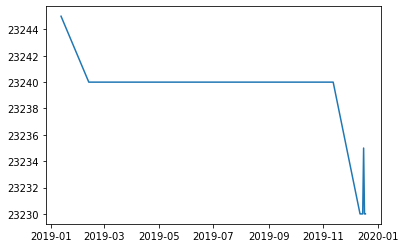

In [77]:
y = data_USD['Selling Rates']
x = data_USD['Date']
show(plot(x, y))

In [78]:
data_USD.describe()

,Cash Rates,Transfer Rates,Selling Rates
count,18.000000,18.000000,18.000000
mean,23086.666667,23116.666667,23236.666667
std,5.144958,5.144958,5.144958
min,23080.000000,23110.000000,23230.000000
25%,23080.000000,23110.000000,23230.000000
50%,23090.000000,23120.000000,23240.000000
75%,23090.000000,23120.000000,23240.000000
max,23095.000000,23125.000000,23245.000000


In [81]:
data_USD.axes

[Int64Index([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
             17],
            dtype='int64'),
 Index(['Currency Name', 'Currency Code', 'Cash Rates', 'Transfer Rates',
        'Selling Rates', 'Date'],
       dtype='object')]

In [82]:
data_USD.ndim

2

In [83]:
data_USD.size

108

In [84]:
data_USD.shape

(18, 6)

In [86]:
data_USD.values

array([['US DOLLAR', 'USD', 23095.0, 23125.0, 23245.0,
        Timestamp('2019-01-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-02-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-03-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-04-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-05-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-06-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-07-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-08-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-09-12 00:00:00')],
       ['US DOLLAR', 'USD', 23090.0, 23120.0, 23240.0,
        Timestamp('2019-10-12 00:00:00')],
       ['US DOLLAR',